# Chap07 - RNN울 사용한 문장 생성

<h1>Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Chap07---RNN울-사용한-문장-생성" data-toc-modified-id="Chap07---RNN울-사용한-문장-생성-1">Chap07 - RNN울 사용한 문장 생성</a></span><ul class="toc-item"><li><span><a href="#Goals" data-toc-modified-id="Goals-1.1">Goals</a></span></li><li><span><a href="#7.1-언어-모델을-사용한-문장-생성" data-toc-modified-id="7.1-언어-모델을-사용한-문장-생성-1.2">7.1 언어 모델을 사용한 문장 생성</a></span><ul class="toc-item"><li><span><a href="#7.1.1-RNN을-사용한-문장-생성의-순서" data-toc-modified-id="7.1.1-RNN을-사용한-문장-생성의-순서-1.2.1">7.1.1 RNN을 사용한 문장 생성의 순서</a></span></li><li><span><a href="#7.1.2-문장-생성-구현" data-toc-modified-id="7.1.2-문장-생성-구현-1.2.2">7.1.2 문장 생성 구현</a></span></li><li><span><a href="#7.1.3-더-좋은-문장으로" data-toc-modified-id="7.1.3-더-좋은-문장으로-1.2.3">7.1.3 더 좋은 문장으로</a></span></li></ul></li><li><span><a href="#7.2-seq2seq" data-toc-modified-id="7.2-seq2seq-1.3">7.2 seq2seq</a></span><ul class="toc-item"><li><span><a href="#7.2.1-seq2seq의-원리" data-toc-modified-id="7.2.1-seq2seq의-원리-1.3.1">7.2.1 seq2seq의 원리</a></span><ul class="toc-item"><li><span><a href="#Encoder-부분" data-toc-modified-id="Encoder-부분-1.3.1.1">Encoder 부분</a></span></li><li><span><a href="#Decoder-부분" data-toc-modified-id="Decoder-부분-1.3.1.2">Decoder 부분</a></span></li><li><span><a href="#seq2seq-전체-구조" data-toc-modified-id="seq2seq-전체-구조-1.3.1.3">seq2seq 전체 구조</a></span></li></ul></li><li><span><a href="#7.2.2-시계열-데이터-변환용-장난감-문제" data-toc-modified-id="7.2.2-시계열-데이터-변환용-장난감-문제-1.3.2">7.2.2 시계열 데이터 변환용 장난감 문제</a></span></li><li><span><a href="#7.2.3-가변-길이-시계열-데이터" data-toc-modified-id="7.2.3-가변-길이-시계열-데이터-1.3.3">7.2.3 가변 길이 시계열 데이터</a></span></li><li><span><a href="#7.2.4-덧셈-데이터셋" data-toc-modified-id="7.2.4-덧셈-데이터셋-1.3.4">7.2.4 덧셈 데이터셋</a></span></li></ul></li><li><span><a href="#7.3-seq2seq-구현" data-toc-modified-id="7.3-seq2seq-구현-1.4">7.3 seq2seq 구현</a></span><ul class="toc-item"><li><span><a href="#7.3.1-Encoder-클래스" data-toc-modified-id="7.3.1-Encoder-클래스-1.4.1">7.3.1 Encoder 클래스</a></span><ul class="toc-item"><li><span><a href="#Time-계층으로-구현" data-toc-modified-id="Time-계층으로-구현-1.4.1.1">Time 계층으로 구현</a></span></li></ul></li><li><span><a href="#7.3.2-Decoder-클래스" data-toc-modified-id="7.3.2-Decoder-클래스-1.4.2">7.3.2 Decoder 클래스</a></span><ul class="toc-item"><li><span><a href="#Time-계층으로-구현" data-toc-modified-id="Time-계층으로-구현-1.4.2.1">Time 계층으로 구현</a></span></li></ul></li><li><span><a href="#7.3.3-seq2seq-클래스" data-toc-modified-id="7.3.3-seq2seq-클래스-1.4.3">7.3.3 seq2seq 클래스</a></span></li><li><span><a href="#7.3.4-seq2seq-평가" data-toc-modified-id="7.3.4-seq2seq-평가-1.4.4">7.3.4 seq2seq 평가</a></span></li></ul></li><li><span><a href="#7.4-seq2seq-개선" data-toc-modified-id="7.4-seq2seq-개선-1.5">7.4 seq2seq 개선</a></span><ul class="toc-item"><li><span><a href="#7.4.1-입력-데이터-반전(Reverse)" data-toc-modified-id="7.4.1-입력-데이터-반전(Reverse)-1.5.1">7.4.1 입력 데이터 반전(Reverse)</a></span><ul class="toc-item"><li><span><a href="#입력-데이터를-반전-시키는데-왜-성능이-좋아질까?에-대한-직관적인-해석" data-toc-modified-id="입력-데이터를-반전-시키는데-왜-성능이-좋아질까?에-대한-직관적인-해석-1.5.1.1">입력 데이터를 반전 시키는데 왜 성능이 좋아질까?에 대한 직관적인 해석</a></span></li></ul></li><li><span><a href="#7.4.2-엿보기(Peeky)" data-toc-modified-id="7.4.2-엿보기(Peeky)-1.5.2">7.4.2 엿보기(Peeky)</a></span><ul class="toc-item"><li><span><a href="#Peeky-seq2seq-학습" data-toc-modified-id="Peeky-seq2seq-학습-1.5.2.1">Peeky seq2seq 학습</a></span></li><li><span><a href="#vanilla-vs-reverse-vs-peeky-결과-비교" data-toc-modified-id="vanilla-vs-reverse-vs-peeky-결과-비교-1.5.2.2">vanilla vs reverse vs peeky 결과 비교</a></span></li></ul></li></ul></li><li><span><a href="#7.5-seq2seq를-이용하는-애플리케이션" data-toc-modified-id="7.5-seq2seq를-이용하는-애플리케이션-1.6">7.5 seq2seq를 이용하는 애플리케이션</a></span><ul class="toc-item"><li><span><a href="#7.5.1-챗봇" data-toc-modified-id="7.5.1-챗봇-1.6.1">7.5.1 챗봇</a></span></li><li><span><a href="#7.5.3-알고리즘-학습" data-toc-modified-id="7.5.3-알고리즘-학습-1.6.2">7.5.3 알고리즘 학습</a></span></li><li><span><a href="#7.5.3-이미지-캡셔닝" data-toc-modified-id="7.5.3-이미지-캡셔닝-1.6.3">7.5.3 이미지 캡셔닝</a></span></li></ul></li><li><span><a href="#7.6-정리" data-toc-modified-id="7.6-정리-1.7">7.6 정리</a></span></li></ul></li></ul></div>

## Goals

- Language Model(LM)을 사용해 '문장 생성'을 수행한다.

- seq2seq라는 새로운 구조의 신경망에 대해 알아본다.

## 7.1 언어 모델을 사용한 문장 생성

### 7.1.1 RNN을 사용한 문장 생성의 순서

- Language Model(LM)은 지금까지 주어딘 단어들에서 다음에 출현하는 단어의 확률분포를 출력한다. 

<img src="./images/fig_7-2.png" width="40%" height="40%" />

- 위의 그림을 토대로 다음 단어를 새로 생성하기 위한 방법은 다음과 같은 방법들이 있다.
    - 확률이 가장 **높은** 단어를 선택한다 → "결정적(deterministic)"인 방법
    - 확률이 높은 단어는 잘 선택되고, 확률이 낮은 단어는 덜 선택한다 → "확률적(probabilistic)"인 방법

> *결정적(deterministic)*이란 (알고리즘)결과가 하나로 정해지는 것, 결과가 예측 가능한 것을 말한다. *확률적(propbabilistic)*인 알고리즘에서는 결과가 활률에 따라 정해지기 때문에, 실행할 때마다 달라진다.

### 7.1.2 문장 생성 구현

- 아래의 코드에서 문장 생성을 수행하는 메서드는 `generate(start_id, skip_ids, sample_size)`다. 
    - `start_id`: 최초로 주는 단어의 ID
    - `skip_ids`: 단어 ID의 리스트 (ex. `[12, 20]`). 이 리스트에 속하는 단어 ID는 샘플링 되지 않도록 한다.
    - `sample_size`: 샘플링하는 단어 수

1. `generate()` 메서드는 가장 먼저 `model.predict(x)`를 호출해 각 단어의 점수(score, softmax 전 값)를 출력한다. 

2. `p = softmax(score)`코드에서 이 점 수들을 소프트맥스 함수를 이용해 정규화한다.

3. 2번에서 얻은 확률분포 `p`로부터 다음 단어를 샘플링한다. 

In [8]:
# chap07/rnnlm_gen.py
import sys
sys.path.append('..')
import numpy as np
from common.functions import softmax
from rnnlm import Rnnlm
from better_rnnlm import BetterRnnlm


class RnnlmGen(Rnnlm):
    def generate(self, start_id, skip_ids=None, sample_size=100):
        word_ids = [start_id]

        x = start_id
        while len(word_ids) < sample_size:
            x = np.array(x).reshape(1, 1)
            score = self.predict(x)
            p = softmax(score.flatten())

            sampled = np.random.choice(len(p), size=1, p=p)
            if (skip_ids is None) or (sampled not in skip_ids):
                x = sampled
                word_ids.append(int(x))

        return word_ids
    
    def get_state(self):
        return self.lstm_layer.h, self.lstm_layer.c

    def set_state(self, state):
        self.lstm_layer.set_state(*state)
        
        
class BetterRnnlmGen(BetterRnnlm):
    def generate(self, start_id, skip_ids=None, sample_size=100):
        word_ids = [start_id]

        x = start_id
        while len(word_ids) < sample_size:
            x = np.array(x).reshape(1, 1)
            score = self.predict(x).flatten()
            p = softmax(score).flatten()

            sampled = np.random.choice(len(p), size=1, p=p)
            if (skip_ids is None) or (sampled not in skip_ids):
                x = sampled
                word_ids.append(int(x))

        return word_ids

    def get_state(self):
        states = []
        for layer in self.lstm_layers:
            states.append((layer.h, layer.c))
        return states

    def set_state(self, states):
        for layer, state in zip(self.lstm_layers, states):
            layer.set_state(*state)

In [6]:
# chap07/generate_text.py
import sys
sys.path.append('..')
from rnnlm_gen import RnnlmGen
from dataset import ptb


corpus, word_to_id, id_to_word = ptb.load_data('train')
vocab_size = len(word_to_id)
corpus_size = len(corpus)

model = RnnlmGen()
model.load_params('./Rnnlm.pkl')

# start 문자와 skip 문자 설정
start_word = 'you'  # 첫 단어 
start_id = word_to_id[start_word]
skip_words = ['N', '<unk>', '$']  # 샘플링하지 않을 단어
skip_ids = [word_to_id[w] for w in skip_words]
# 문장 생성
word_ids = model.generate(start_id, skip_ids)
txt = ' '.join([id_to_word[i] for i in word_ids])
txt = txt.replace(' <eos>', '.\n')
print(txt)

you finds their buying their new products centers in the table hess taiwan and syndicate about the rest.
 carl d.c. president said the goal will hold between six million francs.
 the problem is a hostile program approach after an interview with sex on robert mitchell.
 seats on time and comments the motion and a member of the manhattan committee as of classic scowcroft painful among work defendants.
 mr. bush is n't clear.
 he will make sanctions though attention someone would appear doing a big job.
 but not to politicians rushed to participants on the


### 7.1.3 더 좋은 문장으로

In [1]:
# chap07/generate_better_text.py
# coding: utf-8
import sys
sys.path.append('..')
from common.np import *
from rnnlm_gen import BetterRnnlmGen
from dataset import ptb


corpus, word_to_id, id_to_word = ptb.load_data('train')
vocab_size = len(word_to_id)
corpus_size = len(corpus)


model = BetterRnnlmGen()
model.load_params('./BetterRnnlm.pkl')

# start 문자와 skip 문자 설정
start_word = 'you'
start_id = word_to_id[start_word]
skip_words = ['N', '<unk>', '$']
skip_ids = [word_to_id[w] for w in skip_words]
# 문장 생성
word_ids = model.generate(start_id, skip_ids)
txt = ' '.join([id_to_word[i] for i in word_ids])
txt = txt.replace(' <eos>', '.\n')

print(txt)


model.reset_state()

start_words = 'the meaning of life is'
start_ids = [word_to_id[w] for w in start_words.split(' ')]

for x in start_ids[:-1]:
    x = np.array(x).reshape(1, 1)
    model.predict(x)

word_ids = model.generate(start_ids[-1], skip_ids)
word_ids = start_ids[:-1] + word_ids
txt = ' '.join([id_to_word[i] for i in word_ids])
txt = txt.replace(' <eos>', '.\n')
print('-' * 50)
print(txt)

you 're trying to scuttle the time tomorrow and the is still right enough to stay to try to secure the kind of course.
 or this approach then several a few or three see significant dangers.
 in this part the country would be considering a fine amount fighting to roughly one-third of its former u.s. express return of to work shareholders representing the spurring companies in which management are familiar with a trend is reached.
 the revenues had been outstanding since the plant began in april.
 both the commerce department and commerce department officials in the
--------------------------------------------------
the meaning of life is the only european statutes that enabled mr. bush to consider a possible complaint to determine it.
 mr. lesko hinted to win the cup team after san francisco 's mayor rudolph norton is getting a lucrative agenda.
 mr. boren faces only minor wings for a series of stars in all cases with color showroom and other thoughts.
 but industry executives say the p

## 7.2 seq2seq

### 7.2.1 seq2seq의 원리

- `seq2seq`를 Encoder-Decoder 모델이라고도 한다.

- Encoder는 입력 데이터를 인코딩(부호화)하고, Decoder는 인코딩된 데이터를 디코딩(복호화)한다.

> 인코딩(부호화)이란 정보를 어떤 규칙에 따라 변환하는 것을 말하며, 디코딩(복호화)이란 인코딩된 정보를 원래의 정보로 되돌리는 것을 말한다. 

<img src="./images/fig_7-5.png" width="40%" height="40%" />

- `seq2seq`는 Encoder와 Decoder를 RNN 기반 신경망으로 구성한다. 

#### Encoder 부분

- Encoder는 RNN(LSTM, GRU 등)을 이용해 시계열 데이터를 $\mathbf{h}$라는 hidden state 벡터로 변환한다.

- 아래의 [그림 7-6]은 Encoder가 출력하는 벡터 $\mathbf{h}$는 LSTM 계층의 마지막 hidden state이다. 

- 이 마지막 hidden state $\mathbf{h}$에 입력 문장(출발어)을 번역하는 데 필요한 정보가 인코딩 된다.

- 여기서 중요한 점은 hidden state $\mathbf{h}$는 **고정 길이 벡터**라는 것이며, 결국 인코딩한다라는 것은  임의의 길이의 문장을 고정 길이 벡터로 변환하는 작업이 된다.

<img src="./images/fig_encoder.png" width="50%" height="50%" />

#### Decoder 부분

- Encoder에서 출력된 벡터 $\mathbf{h}$를 입력으로 받아 문장을 생성한다.

> - `<eos>`라는 구분 기호(특수 문자)를 사용헀는데 이 기호는 '구분자'이며, Decoder에 문장 생성의 시작을 알리는 신호로 이용된다. 
> - 또한 Decoder가 `<eos>`를 출력할 때까지 단어를 샘플링하도록 하기 위한 종료 신호이기도 하다.
> - `<eos>`를 Decoder의 **'시작/종료'**를 알리는 구분자로 이용한다.

#### seq2seq 전체 구조

<img src="./images/fig_7-9.png" width="65%" height="65%" />

### 7.2.2 시계열 데이터 변환용 장난감 문제

- 시계열 변환 문제의 예로 '더하기'를 다뤄보자.

<img src="./images/fig_7-10.png" width="45%" height="45%" />

- 위의 문제를 해결하기 위해, '문자' 단위로 분할한다. 
    - `"57+5"`가 입력되면 `['5', '7', '+', '5']`로 분할한 리스트로 처리하는 것을 말한다.

### 7.2.3 가변 길이 시계열 데이터

- 위의 예제에서 데이터 마다 문자 수가 다르다는 것을 확인할 수 있다.
    - `"57+5"`는 총 4 문자이고, `"628+521"`은 총 7 
    
 
- 이렇게 데이터에 따라 timstep 크기가 다른 경우가 대부분이기 때문에 '미니배치 처리'를 위해 별도의 작업을 추가해줘야 한다.

> 미니배치로 학습할 때는 다수의 샘플을 한꺼번에 처리하므로, 한 미니배치에 속한 샘플들의 데이터 형상(shape)이 모두 똑같아야 한다.

- 가변 길이 시계열 데이터를 미니배치로 학습하기 위한 가장 단순한 방법은 **패딩**(padding)을 사용하는 것이다. 
    - 패딩이란 원래의 데이터에 의미없는 데이터를 채워 모든 데이터의 길이를 균일하게 맞추는 기법

- 아래의 그림은 각 데이터에 패딩을 적용한 것이며, 질문과 정답을 구분하기 위해 `_`를 추가해준 것이다.

<img src="./images/fig_7-11.png" width="50%" height="50%" />

- 위의 그림처럼 패딩을 적용하면 가변 길이 시계열 데이터도 처리할 수 있다.

- 하지만, 원래 존재하지 않던 패딩용 문자까지 seq2seq가 처리하게 되는 문제가 발생하게 된다.

- 이러한 문제를 해결하기 위해, Decoder에 입력된 데이터가 패딩일 경우 손실(loss)의 결과에 반영하지 않도록 하는 방법이 있다.
    - `Softmax with Loss` 레이어에 '마스크'(Mask) 기능을 추가
    
    
- 그렇게 되면 Encoder 부분에서 패딩이 존재하지 않았던 것처럼 인코딩할 수 있다.

### 7.2.4 덧셈 데이터셋 

In [1]:
# coding: utf-8
import sys
sys.path.append('..')
from dataset import sequence


(x_train, t_train), (x_test, t_test) = \
    sequence.load_data('addition.txt', seed=1984)
char_to_id, id_to_char = sequence.get_vocab()

print(x_train.shape, t_train.shape)
print(x_test.shape, t_test.shape)
# (45000, 7) (45000, 5)
# (5000, 7) (5000, 5)

print(x_train[0])
print(t_train[0])
# [ 3  0  2  0  0 11  5]
# [ 6  0 11  7  5]

print(''.join([id_to_char[c] for c in x_train[0]]))
print(''.join([id_to_char[c] for c in t_train[0]]))
# 71+118
# _189

(45000, 7) (45000, 5)
(5000, 7) (5000, 5)
[ 3  0  2  0  0 11  5]
[ 6  0 11  7  5]
71+118 
_189 


## 7.3 seq2seq 구현

### 7.3.1 Encoder 클래스

- Encoder 클래스는 아래의 그림처럼 문자열을 입력으로 받아 벡터 $\mathbf{h}$로 변환한다.

- 아래의 그림에서 볼 수 있듯이 Encoder에서는 마지막 문자를 처리한 후 LSTM 계층의 hidden state $\mathbf{h}$를 출력하고, 이 $\mathbf{h}$가 Decoder로 전달된다.

<img src="./images/fig_7-14.png" width="60%" height="60%" />

#### Time 계층으로 구현

<img src="./images/fig_7-15.png" width="40%" height="40%" />

In [2]:
# chap07/seq2seq.py
# coding: utf-8
import sys
sys.path.append('..')
from common.time_layers import *
from common.base_model import BaseModel


class Encoder:
    def __init__(self, vocab_size, wordvec_size, hidden_size):
        V, D, H = vocab_size, wordvec_size, hidden_size
        rn = np.random.randn

        embed_W = (rn(V, D) / 100).astype('f')
        lstm_Wx = (rn(D, 4 * H) / np.sqrt(D)).astype('f')
        lstm_Wh = (rn(H, 4 * H) / np.sqrt(H)).astype('f')
        lstm_b = np.zeros(4 * H).astype('f')

        self.embed = TimeEmbedding(embed_W)
        self.lstm = TimeLSTM(lstm_Wx, lstm_Wh, lstm_b, stateful=False)

        self.params = self.embed.params + self.lstm.params  # 리스트
        self.grads = self.embed.grads + self.lstm.grads  # 리스트
        self.hs = None

    def forward(self, xs):
        xs = self.embed.forward(xs)
        hs = self.lstm.forward(xs)
        self.hs = hs
        return hs[:, -1, :]  # 마지막 hidden state

    def backward(self, dh):
        dhs = np.zeros_like(self.hs)
        dhs[:, -1, :] = dh

        dout = self.lstm.backward(dhs)
        dout = self.embed.backward(dout)
        return dout

### 7.3.2 Decoder 클래스

- Decoder 클래스는 아래의 그림과 같이, Encoder가 출력한 $\mathbf{h}$를 입력으로 받아 목적으로 하는 다른 문자열을 출력하는 것이다.

> seq2seq에서 문장을 생성하는 Task에서는 Encoder와 Decoder에 입력으로 넣어주는 데이터에 대한 부여 방법이 다르다.
> - 학습(train)시에는 평소에 우리가 알고있는 학습 시킬 데이터를 넣어주면 된다.
> - **한편, 추론(inference)**시에는 최초 시작을 알리는 구분 문자(여기서는 `'_'`) 하나만 넣어주고, 그 후부터는 샘플링한 결과를 입력으로 넣어준다.

<img src="./images/fig_7-17.png" width="50%" height="50%" />

#### Time 계층으로 구현

<img src="./images/fig_7-19.png" width="40%" height="40%" />

In [4]:
class Decoder:
    def __init__(self, vocab_size, wordvec_size, hidden_size):
        V, D, H = vocab_size, wordvec_size, hidden_size
        rn = np.random.randn

        embed_W = (rn(V, D) / 100).astype('f')
        lstm_Wx = (rn(D, 4 * H) / np.sqrt(D)).astype('f')
        lstm_Wh = (rn(H, 4 * H) / np.sqrt(H)).astype('f')
        lstm_b = np.zeros(4 * H).astype('f')
        affine_W = (rn(H, V) / np.sqrt(H)).astype('f')
        affine_b = np.zeros(V).astype('f')

        self.embed = TimeEmbedding(embed_W)
        self.lstm = TimeLSTM(lstm_Wx, lstm_Wh, lstm_b, stateful=True)
        self.affine = TimeAffine(affine_W, affine_b)

        self.params, self.grads = [], []
        for layer in (self.embed, self.lstm, self.affine):
            self.params += layer.params
            self.grads += layer.grads

    def forward(self, xs, h):
        self.lstm.set_state(h)

        out = self.embed.forward(xs)
        out = self.lstm.forward(out)
        score = self.affine.forward(out)
        return score

    def backward(self, dscore):
        dout = self.affine.backward(dscore)
        dout = self.lstm.backward(dout)
        dout = self.embed.backward(dout)
        dh = self.lstm.dh
        return dh

    def generate(self, h, start_id, sample_size):
        sampled = []
        sample_id = start_id
        self.lstm.set_state(h)

        for _ in range(sample_size):
            x = np.array(sample_id).reshape((1, 1))
            out = self.embed.forward(x)
            out = self.lstm.forward(out)
            score = self.affine.forward(out)

            sample_id = np.argmax(score.flatten())
            sampled.append(int(sample_id))

        return sampled

### 7.3.3 seq2seq 클래스

In [5]:
class Seq2seq(BaseModel):
    def __init__(self, vocab_size, wordvec_size, hidden_size):
        V, D, H = vocab_size, wordvec_size, hidden_size
        self.encoder = Encoder(V, D, H)
        self.decoder = Decoder(V, D, H)
        self.softmax = TimeSoftmaxWithLoss()

        self.params = self.encoder.params + self.decoder.params
        self.grads = self.encoder.grads + self.decoder.grads

    def forward(self, xs, ts):
        decoder_xs, decoder_ts = ts[:, :-1], ts[:, 1:]

        h = self.encoder.forward(xs)
        score = self.decoder.forward(decoder_xs, h)
        loss = self.softmax.forward(score, decoder_ts)
        return loss

    def backward(self, dout=1):
        dout = self.softmax.backward(dout)
        dh = self.decoder.backward(dout)
        dout = self.encoder.backward(dh)
        return dout

    def generate(self, xs, start_id, sample_size):
        h = self.encoder.forward(xs)
        sampled = self.decoder.generate(h, start_id, sample_size)
        return sampled

### 7.3.4 seq2seq 평가

- seq2seq 또한 다음과 같은 방식으로 학습이 이루어진다.

1. 학습 데이터에서 미니배치를 선택하고,
2. 미니배치로 부터 기울기를 선택하고,
3. 기울기를 사용하여 매개변수를 갱신한다.

| 에폭 1 |  반복 1 / 351 | 시간 0[s] | 손실 2.56
| 에폭 1 |  반복 151 / 351 | 시간 3[s] | 손실 2.00
| 에폭 1 |  반복 301 / 351 | 시간 6[s] | 손실 1.76
Q 77+85  
T 162 
X 100 
---
Q 975+164
T 1139
X 1000
---
Q 582+84 
T 666 
X 1000
---
Q 8+155  
T 163 
X 100 
---
Q 367+55 
T 422 
X 1000
---
Q 600+257
T 857 
X 1000
---
Q 761+292
T 1053
X 1000
---
Q 830+597
T 1427
X 1000
---
Q 26+838 
T 864 
X 1000
---
Q 143+93 
T 236 
X 100 
---
검증 정확도 0.180%
| 에폭 2 |  반복 1 / 351 | 시간 0[s] | 손실 1.74
| 에폭 2 |  반복 151 / 351 | 시간 3[s] | 손실 1.73
| 에폭 2 |  반복 301 / 351 | 시간 6[s] | 손실 1.70
Q 77+85  
T 162 
X 994 
---
Q 975+164
T 1139
X 1000
---
Q 582+84 
T 666 
X 700 
---
Q 8+155  
T 163 
X 100 
---
Q 367+55 
T 422 
X 400 
---
Q 600+257
T 857 
X 1000
---
Q 761+292
T 1053
X 1000
---
Q 830+597
T 1427
X 1544
---
Q 26+838 
T 864 
X 400 
---
Q 143+93 
T 236 
X 400 
---
검증 정확도 0.220%
| 에폭 3 |  반복 1 / 351 | 시간 0[s] | 손실 1.66
| 에폭 3 |  반복 151 / 351 | 시간 3[s] | 손실 1.62
| 에폭 3 |  반복 301 / 351 | 시간 5[s] | 손실 1.53
Q 77+85  
T 162 
X 108 
---
Q 9

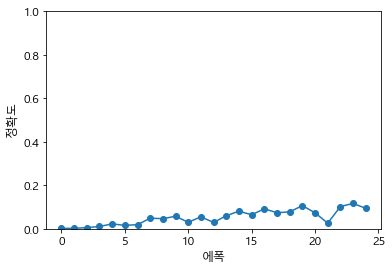

In [11]:
# coding: utf-8
import sys
sys.path.append('..')
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.font_manager as fm
font_path = 'C:/Windows/Fonts/malgun.ttf'
font_name = fm.FontProperties(fname=font_path, size=10).get_name()
plt.rc('font', family=font_name, size=12)
from dataset import sequence
from common.optimizer import Adam
from common.trainer import Trainer
from common.util import eval_seq2seq
from seq2seq import Seq2seq
# from peeky_seq2seq import PeekySeq2seq


# 데이터셋 읽기
(x_train, t_train), (x_test, t_test) = sequence.load_data('addition.txt')
char_to_id, id_to_char = sequence.get_vocab()

# 입력 반전 여부 설정 =============================================
is_reverse = False  # True
if is_reverse:
    x_train, x_test = x_train[:, ::-1], x_test[:, ::-1]
# ================================================================

# 하이퍼파라미터 설정
vocab_size = len(char_to_id)
wordvec_size = 16
hideen_size = 128
batch_size = 128
max_epoch = 25
max_grad = 5.0

# 일반 혹은 엿보기(Peeky) 설정 =====================================
model = Seq2seq(vocab_size, wordvec_size, hideen_size)
# model = PeekySeq2seq(vocab_size, wordvec_size, hideen_size)
# ================================================================
optimizer = Adam()
trainer = Trainer(model, optimizer)

vanilla_acc_list = []
for epoch in range(max_epoch):
    trainer.fit(x_train, t_train, max_epoch=1,
                batch_size=batch_size, max_grad=max_grad, eval_interval=150)

    correct_num = 0
    for i in range(len(x_test)):
        question, correct = x_test[[i]], t_test[[i]]
        verbose = i < 10
        correct_num += eval_seq2seq(model, question, correct,
                                    id_to_char, verbose, is_reverse)

    acc = float(correct_num) / len(x_test)
    vanilla_acc_list.append(acc)
    print('검증 정확도 %.3f%%' % (acc * 100))

# 그래프 그리기
x = np.arange(len(vanilla_acc_list))
plt.plot(x, vanilla_acc_list, marker='o')
plt.xlabel('에폭')
plt.ylabel('정확도')
plt.ylim(0, 1.0)
plt.show()

## 7.4 seq2seq 개선

### 7.4.1 입력 데이터 반전(Reverse)

- [seq2seq learning with neural network](https://papers.nips.cc/paper/5346-sequence-to-sequence-learning-with-neural-networks.pdf) 논문에서 제안한 방법이다.

- 아래의 그림과 같이 입력 데이터를 반전(reverse)시켜 입력 데이터로 사용하는 방법으로, 학습 속도와 정확도가 올라간다.

<img src="./images/fig_7-23.png" width="55%" height="55%" />

| 에폭 1 |  반복 1 / 351 | 시간 0[s] | 손실 2.56
| 에폭 1 |  반복 151 / 351 | 시간 2[s] | 손실 2.00
| 에폭 1 |  반복 301 / 351 | 시간 5[s] | 손실 1.76
Q 77+85  
T 162 
X 100 
---
Q 975+164
T 1139
X 1000
---
Q 582+84 
T 666 
X 1001
---
Q 8+155  
T 163 
X 100 
---
Q 367+55 
T 422 
X 1001
---
Q 600+257
T 857 
X 1000
---
Q 761+292
T 1053
X 1000
---
Q 830+597
T 1427
X 1000
---
Q 26+838 
T 864 
X 1001
---
Q 143+93 
T 236 
X 703 
---
검증 정확도 0.120%
| 에폭 2 |  반복 1 / 351 | 시간 0[s] | 손실 1.73
| 에폭 2 |  반복 151 / 351 | 시간 2[s] | 손실 1.70
| 에폭 2 |  반복 301 / 351 | 시간 5[s] | 손실 1.63
Q 77+85  
T 162 
X 100 
---
Q 975+164
T 1139
X 1000
---
Q 582+84 
T 666 
X 690 
---
Q 8+155  
T 163 
X 1000
---
Q 367+55 
T 422 
X 470 
---
Q 600+257
T 857 
X 700 
---
Q 761+292
T 1053
X 1000
---
Q 830+597
T 1427
X 1444
---
Q 26+838 
T 864 
X 700 
---
Q 143+93 
T 236 
X 370 
---
검증 정확도 0.400%
| 에폭 3 |  반복 1 / 351 | 시간 0[s] | 손실 1.52
| 에폭 3 |  반복 151 / 351 | 시간 2[s] | 손실 1.47
| 에폭 3 |  반복 301 / 351 | 시간 5[s] | 손실 1.34
Q 77+85  
T 162 
X 158 
---
Q 9

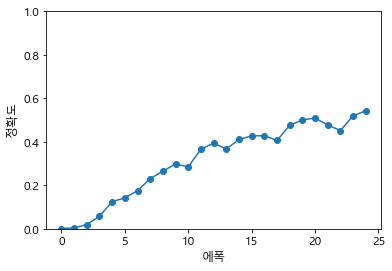

In [12]:
# coding: utf-8
import sys
sys.path.append('..')
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.font_manager as fm
font_path = 'C:/Windows/Fonts/malgun.ttf'
font_name = fm.FontProperties(fname=font_path, size=10).get_name()
plt.rc('font', family=font_name, size=12)
from dataset import sequence
from common.optimizer import Adam
from common.trainer import Trainer
from common.util import eval_seq2seq
from seq2seq import Seq2seq
# from peeky_seq2seq import PeekySeq2seq


# 데이터셋 읽기
(x_train, t_train), (x_test, t_test) = sequence.load_data('addition.txt')
char_to_id, id_to_char = sequence.get_vocab()

# 입력 반전 여부 설정 =============================================
is_reverse = True
if is_reverse:
    x_train, x_test = x_train[:, ::-1], x_test[:, ::-1]
# ================================================================

# 하이퍼파라미터 설정
vocab_size = len(char_to_id)
wordvec_size = 16
hideen_size = 128
batch_size = 128
max_epoch = 25
max_grad = 5.0

# 일반 혹은 엿보기(Peeky) 설정 =====================================
model = Seq2seq(vocab_size, wordvec_size, hideen_size)
# model = PeekySeq2seq(vocab_size, wordvec_size, hideen_size)
# ================================================================
optimizer = Adam()
trainer = Trainer(model, optimizer)

reverse_acc_list = []
for epoch in range(max_epoch):
    trainer.fit(x_train, t_train, max_epoch=1,
                batch_size=batch_size, max_grad=max_grad, eval_interval=150)

    correct_num = 0
    for i in range(len(x_test)):
        question, correct = x_test[[i]], t_test[[i]]
        verbose = i < 10
        correct_num += eval_seq2seq(model, question, correct,
                                    id_to_char, verbose, is_reverse)

    acc = float(correct_num) / len(x_test)
    reverse_acc_list.append(acc)
    print('검증 정확도 %.3f%%' % (acc * 100))

# 그래프 그리기
x_reverse = np.arange(len(reverse_acc_list))
plt.plot(x_reverse, reverse_acc_list, marker='o')
plt.xlabel('에폭')
plt.ylabel('정확도')
plt.ylim(0, 1.0)
plt.show()

#### 입력 데이터를 반전 시키는데 왜 성능이 좋아질까?에 대한 직관적인 해석

- Backpropagation시 기울기 전파가 원활해지기 때문이다.

- 아래의 그림에서처럼, `"나 는 고양이 로소 이다"` → `"이다 로소 고양이 는 나"`로 바뀜에따라 `"I"`에서 `"나"`로 바로 기울기가 전달 되기 때문에 학습이 더 잘 된다고 볼 수 있다.

<img src="./images/fig_reverse.png" width="75%" height="75%" />

### 7.4.2 엿보기(Peeky)

- 일반적인 seq2seq는 Encoder의 마지막 hidden state $\mathbf{h}$ 하나만이 Decoder에서 첫 timestep의 입력으로 들어간다.

- Peeky Decoder는 [Cho et.al](https://www.aclweb.org/anthology/D14-1179)이 제안한 아이디어를 기반으로 만들어진 Decoder이다.

- 아래의 그림과 같이 모든 timestep의 Affine 레이어와 LSTM 레이어에 Encoder의 출력인 $\mathbf{h}$를 전달한다. 

- 즉, 인코딩된 정보를 Decoder의 다른 레이어에도 전달해 주는 기법이다.

- 하지만, peeky를 사용하게 되면 학습시켜야할 가중치 매개변수가 커지기 때문에 계산량이 많아지는 단점이 있다.

<img src="./images/fig_peeky2.png" width="95%" height="95%" />

In [8]:
# chap07/peeky_seq2seq.py
# coding: utf-8
import sys
sys.path.append('..')
from common.time_layers import *
from seq2seq import Seq2seq, Encoder


class PeekyDecoder:
    def __init__(self, vocab_size, wordvec_size, hidden_size):
        V, D, H = vocab_size, wordvec_size, hidden_size
        rn = np.random.randn

        embed_W = (rn(V, D) / 100).astype('f')
        lstm_Wx = (rn(H + D, 4 * H) / np.sqrt(H + D)).astype('f')
        lstm_Wh = (rn(H, 4 * H) / np.sqrt(H)).astype('f')
        lstm_b = np.zeros(4 * H).astype('f')
        affine_W = (rn(H + H, V) / np.sqrt(H + H)).astype('f')
        affine_b = np.zeros(V).astype('f')

        self.embed = TimeEmbedding(embed_W)
        self.lstm = TimeLSTM(lstm_Wx, lstm_Wh, lstm_b, stateful=True)
        self.affine = TimeAffine(affine_W, affine_b)

        self.params, self.grads = [], []
        for layer in (self.embed, self.lstm, self.affine):
            self.params += layer.params
            self.grads += layer.grads
        self.cache = None

    def forward(self, xs, h):
        N, T = xs.shape
        N, H = h.shape

        self.lstm.set_state(h)

        out = self.embed.forward(xs)
        hs = np.repeat(h, T, axis=0).reshape(N, T, H)  # 매 timestep 입력
        out = np.concatenate((hs, out), axis=2)  # concat 후 LSTM으로 입력

        out = self.lstm.forward(out)
        out = np.concatenate((hs, out), axis=2)  # concat 후 Affine으로 입력

        score = self.affine.forward(out)
        self.cache = H
        return score

    def backward(self, dscore):
        H = self.cache

        dout = self.affine.backward(dscore)
        dout, dhs0 = dout[:, :, H:], dout[:, :, :H]
        dout = self.lstm.backward(dout)
        dembed, dhs1 = dout[:, :, H:], dout[:, :, :H]
        self.embed.backward(dembed)

        dhs = dhs0 + dhs1
        dh = self.lstm.dh + np.sum(dhs, axis=1)
        return dh

    def generate(self, h, start_id, sample_size):
        sampled = []
        char_id = start_id
        self.lstm.set_state(h)

        H = h.shape[1]
        peeky_h = h.reshape(1, 1, H)
        for _ in range(sample_size):
            x = np.array([char_id]).reshape((1, 1))
            out = self.embed.forward(x)

            out = np.concatenate((peeky_h, out), axis=2)
            out = self.lstm.forward(out)
            out = np.concatenate((peeky_h, out), axis=2)
            score = self.affine.forward(out)

            char_id = np.argmax(score.flatten())
            sampled.append(char_id)

        return sampled


class PeekySeq2seq(Seq2seq):
    def __init__(self, vocab_size, wordvec_size, hidden_size):
        V, D, H = vocab_size, wordvec_size, hidden_size
        self.encoder = Encoder(V, D, H)
        self.decoder = PeekyDecoder(V, D, H)
        self.softmax = TimeSoftmaxWithLoss()

        self.params = self.encoder.params + self.decoder.params
        self.grads = self.encoder.grads + self.decoder.grads

#### Peeky seq2seq 학습

| 에폭 1 |  반복 1 / 351 | 시간 0[s] | 손실 2.57
| 에폭 1 |  반복 151 / 351 | 시간 3[s] | 손실 1.99
| 에폭 1 |  반복 301 / 351 | 시간 6[s] | 손실 1.76
Q 77+85  
T 162 
X 100 
---
Q 975+164
T 1139
X 1013
---
Q 582+84 
T 666 
X 102 
---
Q 8+155  
T 163 
X 100 
---
Q 367+55 
T 422 
X 1023
---
Q 600+257
T 857 
X 1023
---
Q 761+292
T 1053
X 1023
---
Q 830+597
T 1427
X 1111
---
Q 26+838 
T 864 
X 102 
---
Q 143+93 
T 236 
X 102 
---
검증 정확도 0.280%
| 에폭 2 |  반복 1 / 351 | 시간 0[s] | 손실 1.71
| 에폭 2 |  반복 151 / 351 | 시간 3[s] | 손실 1.70
| 에폭 2 |  반복 301 / 351 | 시간 6[s] | 손실 1.64
Q 77+85  
T 162 
X 100 
---
Q 975+164
T 1139
X 1200
---
Q 582+84 
T 666 
X 690 
---
Q 8+155  
T 163 
X 100 
---
Q 367+55 
T 422 
X 690 
---
Q 600+257
T 857 
X 999 
---
Q 761+292
T 1053
X 1029
---
Q 830+597
T 1427
X 1240
---
Q 26+838 
T 864 
X 792 
---
Q 143+93 
T 236 
X 290 
---
검증 정확도 0.400%
| 에폭 3 |  반복 1 / 351 | 시간 0[s] | 손실 1.58
| 에폭 3 |  반복 151 / 351 | 시간 3[s] | 손실 1.54
| 에폭 3 |  반복 301 / 351 | 시간 6[s] | 손실 1.43
Q 77+85  
T 162 
X 154 
---
Q 9

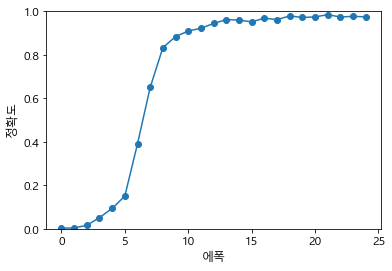

In [13]:
# coding: utf-8
import sys
sys.path.append('..')
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.font_manager as fm
font_path = 'C:/Windows/Fonts/malgun.ttf'
font_name = fm.FontProperties(fname=font_path, size=10).get_name()
plt.rc('font', family=font_name, size=12)
from dataset import sequence
from common.optimizer import Adam
from common.trainer import Trainer
from common.util import eval_seq2seq
from seq2seq import Seq2seq
from peeky_seq2seq import PeekySeq2seq


# 데이터셋 읽기
(x_train, t_train), (x_test, t_test) = sequence.load_data('addition.txt')
char_to_id, id_to_char = sequence.get_vocab()

# 입력 반전 여부 설정 =============================================
is_reverse = True
if is_reverse:
    x_train, x_test = x_train[:, ::-1], x_test[:, ::-1]
# ================================================================

# 하이퍼파라미터 설정
vocab_size = len(char_to_id)
wordvec_size = 16
hideen_size = 128
batch_size = 128
max_epoch = 25
max_grad = 5.0

# 일반 혹은 엿보기(Peeky) 설정 =====================================
# model = Seq2seq(vocab_size, wordvec_size, hideen_size)
model = PeekySeq2seq(vocab_size, wordvec_size, hideen_size)
# ================================================================
optimizer = Adam()
trainer = Trainer(model, optimizer)

peeky_acc_list = []
for epoch in range(max_epoch):
    trainer.fit(x_train, t_train, max_epoch=1,
                batch_size=batch_size, max_grad=max_grad, eval_interval=150)

    correct_num = 0
    for i in range(len(x_test)):
        question, correct = x_test[[i]], t_test[[i]]
        verbose = i < 10
        correct_num += eval_seq2seq(model, question, correct,
                                    id_to_char, verbose, is_reverse)

    acc = float(correct_num) / len(x_test)
    peeky_acc_list.append(acc)
    print('검증 정확도 %.3f%%' % (acc * 100))

# 그래프 그리기
x_peeky = np.arange(len(peeky_acc_list))
plt.plot(x_reverse, peeky_acc_list, marker='o')
plt.xlabel('에폭')
plt.ylabel('정확도')
plt.ylim(0, 1.0)
plt.show()

#### vanilla vs reverse vs peeky 결과 비교

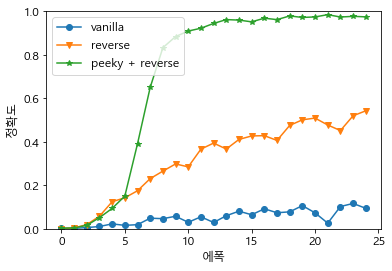

In [16]:
plt.plot(x, vanilla_acc_list, marker='o')
plt.plot(x_reverse, reverse_acc_list, marker='v')
plt.plot(x_peeky, peeky_acc_list, marker='*')
plt.legend(['vanilla', 'reverse', 'peeky + reverse'], loc='upper left')
plt.xlabel('에폭')
plt.ylabel('정확도')
plt.ylim(0, 1.0)
plt.show()

## 7.5 seq2seq를 이용하는 애플리케이션

seq2seq는 '한 시계열 데이터'를 '다른 시계열 데이터'로 변환하는 다양한 문제에 적용할 수 있다.

- 기계번역: '한 언어의 문장'을 '다른 언어의 문장'으로 변환

- 자동 요약: '긴 문장'을 '짧게 요약된 문장'으로 변환

- 질의 응답: '질문'을 '응답'으로 변환

- 메일 자동 응답: '받은 메일의 문장'을 '답변 글'로 변환

### 7.5.1 챗봇

- '상대방의 말' → '자신의 말'로 변환

### 7.5.3 알고리즘 학습

### 7.5.3 이미지 캡셔닝

- 이미지 캡셔닝(Image Captioning)은 '이미지' → '문장' 으로 변환하는 Task다.

- Encoder 부분에서 RNN 계열의 레이어가 아닌 이미지를 처리하는 CNN 으로 바뀐것이 가장 큰 차이점이다.

![](./images/fig_7-31.png)

## 7.6 정리

- RNN을 이용한 언어 모델은 새로운 문장을 생성할 수 있다.

- 문장을 생성할 때는 하나의 단어(혹은 문자)를 주고 모델의 출력(확률분포)에서 샘플링하는 과정을 반복한다.

- RNN을 2개 조합함으로써 시계열 데이터를 다른 시계열 데이터로 변환할 수 있다.

- seq2seq는 Encoder가 출발어 입력문을 인코딩하고, 인코딩된 정보를 Decoder가 받아 디코딩하여 도착어 출력문을 얻는다.

- 입력문을 반전시키는 기법(Reverse), 또는 인코딩된 정보를 Decoder의 여러 계층에 전달하는 기법(Peeky)은 seq2seq의 정확도 향상에 효과적이다. 

- 기계번역, 챗봇, 이미지 캡셔닝 등 seq2seq는 다양한 애플리케이션에 이용될 수 있다.